In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import sklearn
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for model in mpl, np, pd, sklearn, keras:
    print(model.__name__, model.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow_core.keras 2.2.4-tf


In [2]:
# 回归问题
# 加利福利亚
from sklearn.datasets import fetch_california_housing
#加载数据
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
#展示数据 查看规律
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

#数据切割 训练集 验证集 测试
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

#数据归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled =  scaler.transform(x_test)

In [6]:
# 超参数搜索
# RandomizedSearchCV
# 1、转化为sklearn的model
# 2、定义参数集合
# 3、搜索参数，选择最优

def build_model(hidden_layers =1 , layer_size = 30, learning_rate = 3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size,activation='relu',input_shape=x_train.shape[1:]))
    for i in range(hidden_layers -1 ):
        model.add(keras.layers.Dense(layer_size,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse',optimiezer=optimizer, metrics=['accuracy']) # mse  mean_squared_error
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn = build_model) #转化为sklearn的model

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]
history = sklearn_model.fit(x_train_scaled,y_train, validation_data = (x_valid_scaled,y_valid), epochs=30, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 192us/sample - loss: 1.9386 - accuracy: 0.0022 - val_loss: 0.6488 - val_accuracy: 0.0021
Epoch 2/30
11610/11610 [==============================] - 1s 87us/sample - loss: 0.8580 - accuracy: 0.0031 - val_loss: 0.5710 - val_accuracy: 0.0021
Epoch 3/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7668 - accuracy: 0.0031 - val_loss: 0.5263 - val_accuracy: 0.0023
Epoch 4/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.7350 - accuracy: 0.0030 - val_loss: 0.5009 - val_accuracy: 0.0023
Epoch 5/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5907 - accuracy: 0.0030 - val_loss: 0.4619 - val_accuracy: 0.0023
Epoch 6/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5260 - accuracy: 0.0030 - val_loss: 0.4298 - val_accuracy: 0.0023
Epoch 7/30
11610/11610 [==============================] 

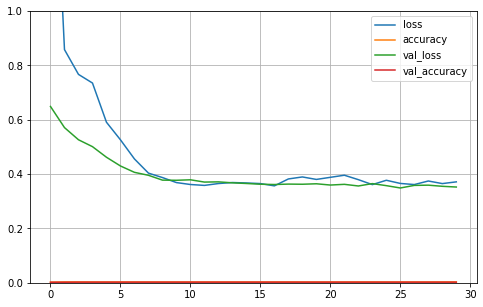

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [10]:
# 定义搜索参数
from scipy.stats import reciprocal
from scipy.stats import uniform as sp_rand
# f(x) = 1/(x*log(b/a)) a <= x <= b
layer_size = np.arange(1, 50)
learning_rate = reciprocal(1e-3, 1e-2)
params_distribution = {"hidden_layers" : [1,2,3,4], 
                       #"layer_size" : layer_size,
                       "learning_rate": [1e-4,1e-3,1e-2,1e-1],
                      }
'''
# 问题解决 https://bbs.csdn.net/topics/395826475?page=1
# param的参数空间需要直接传列表，而不是函数或者迭代器。
params_distribution = {"hidden_layers" : [1,2,3,4], 
                       "layer_size" : np.arange(1, 100),
                       "learning_rate": reciprocal(1e-4, 1e-2),}
'''

# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search_cv= RandomizedSearchCV(sklearn_model, params_distribution, n_iter = 10, cv=3, n_jobs=1)
random_search_cv.fit(x_train_scaled, y_train, epochs = 10, validation_data = (x_valid_scaled, y_valid),callbacks = callbacks)
# cross_validation: 训练集分成n份，n-1训练，最后一份验证.

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 204us/sample - loss: 0.9392 - accuracy: 0.0032 - val_loss: 0.5279 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.4571 - accuracy: 0.0032 - val_loss: 0.4292 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3971 - accuracy: 0.0032 - val_loss: 0.3802 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 100us/sample - loss: 0.3773 - accuracy: 0.0032 - val_loss: 0.3773 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.3666 - accuracy: 0.0032 - val_loss: 0.3531 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3540 - accuracy: 0.0032 - val_loss: 0.3812 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 100us/sa

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 192us/sample - loss: 1.0732 - accuracy: 0.0031 - val_loss: 0.5605 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4731 - accuracy: 0.0031 - val_loss: 0.4379 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4068 - accuracy: 0.0031 - val_loss: 0.4089 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3843 - accuracy: 0.0031 - val_loss: 0.3848 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3712 - accuracy: 0.0031 - val_loss: 0.3969 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 104us/sample - loss: 0.3615 - accuracy: 0.0031 - val_loss: 0.3576 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 80us/samp

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 242us/sample - loss: 0.8663 - accuracy: 0.0030 - val_loss: 0.5502 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4215 - accuracy: 0.0030 - val_loss: 0.4214 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.3857 - accuracy: 0.0028 - val_loss: 0.3868 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 79us/sample - loss: 0.3620 - accuracy: 0.0030 - val_loss: 0.4256 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3446 - accuracy: 0.0030 - val_loss: 0.3790 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3358 - accuracy: 0.0028 - val_loss: 0.3686 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 90us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 189us/sample - loss: 1.3952 - accuracy: 0.0031 - val_loss: 0.7002 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.5605 - accuracy: 0.0032 - val_loss: 0.5131 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 99us/sample - loss: 0.4674 - accuracy: 0.0032 - val_loss: 0.4497 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4206 - accuracy: 0.0032 - val_loss: 0.4174 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3936 - accuracy: 0.0031 - val_loss: 0.4057 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3730 - accuracy: 0.0032 - val_loss: 0.3859 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 78us/sampl

3870/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 189us/sample - loss: 1.2526 - accuracy: 0.0028 - val_loss: 0.6060 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4884 - accuracy: 0.0031 - val_loss: 0.4708 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.4827 - accuracy: 0.0031 - val_loss: 0.4595 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.4377 - accuracy: 0.0031 - val_loss: 0.4529 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4097 - accuracy: 0.0031 - val_loss: 0.3993 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.3896 - accuracy: 0.0031 - val_loss: 0.3893 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 76us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 174us/sample - loss: 1.4138 - accuracy: 0.0030 - val_loss: 0.6587 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5638 - accuracy: 0.0030 - val_loss: 0.4873 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.4003 - accuracy: 0.0030 - val_loss: 0.4236 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3761 - accuracy: 0.0030 - val_loss: 0.4095 - val_accuracy: 0.0021
Epoch 5/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3660 - accuracy: 0.0030 - val_loss: 0.3995 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3538 - accuracy: 0.0030 - val_loss: 0.3863 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 97us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 263us/sample - loss: 0.9897 - accuracy: 0.0032 - val_loss: 0.5166 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.4529 - accuracy: 0.0032 - val_loss: 0.4544 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3993 - accuracy: 0.0032 - val_loss: 0.3891 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 93us/sample - loss: 0.3781 - accuracy: 0.0032 - val_loss: 0.3909 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3646 - accuracy: 0.0032 - val_loss: 0.3652 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.3497 - accuracy: 0.0032 - val_loss: 0.3585 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 102us/samp

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 215us/sample - loss: 0.8642 - accuracy: 0.0031 - val_loss: 0.4988 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4408 - accuracy: 0.0031 - val_loss: 0.4292 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.4028 - accuracy: 0.0031 - val_loss: 0.4003 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 90us/sample - loss: 0.3810 - accuracy: 0.0031 - val_loss: 0.3882 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.3676 - accuracy: 0.0031 - val_loss: 0.3711 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.3577 - accuracy: 0.0031 - val_loss: 0.3586 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 88us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 218us/sample - loss: 0.8967 - accuracy: 0.0028 - val_loss: 0.4877 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4118 - accuracy: 0.0030 - val_loss: 0.4100 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3795 - accuracy: 0.0030 - val_loss: 0.4081 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3627 - accuracy: 0.0030 - val_loss: 0.3777 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3512 - accuracy: 0.0030 - val_loss: 0.3950 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 103us/sample - loss: 0.3357 - accuracy: 0.0030 - val_loss: 0.3662 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 87us/samp

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 173us/sample - loss: 1.4736 - accuracy: 0.0032 - val_loss: 0.6784 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.5319 - accuracy: 0.0032 - val_loss: 0.4749 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4537 - accuracy: 0.0032 - val_loss: 0.4357 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.4153 - accuracy: 0.0032 - val_loss: 0.4067 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3885 - accuracy: 0.0032 - val_loss: 0.3967 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 79us/sample - loss: 0.3724 - accuracy: 0.0032 - val_loss: 0.3716 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 78us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 223us/sample - loss: 1.2853 - accuracy: 0.0027 - val_loss: 0.6035 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5114 - accuracy: 0.0031 - val_loss: 0.4646 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4527 - accuracy: 0.0031 - val_loss: 0.4232 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3936 - accuracy: 0.0031 - val_loss: 0.3874 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3733 - accuracy: 0.0031 - val_loss: 0.3725 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3608 - accuracy: 0.0031 - val_loss: 0.3630 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 78us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 177us/sample - loss: 1.1644 - accuracy: 0.0030 - val_loss: 0.6046 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.4637 - accuracy: 0.0030 - val_loss: 0.4876 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4451 - accuracy: 0.0030 - val_loss: 0.4400 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 98us/sample - loss: 0.3912 - accuracy: 0.0030 - val_loss: 0.4034 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3671 - accuracy: 0.0030 - val_loss: 0.3893 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 79us/sample - loss: 0.3559 - accuracy: 0.0030 - val_loss: 0.3857 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 79us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 151us/sample - loss: 1.4606 - accuracy: 0.0032 - val_loss: 0.7895 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.7567 - accuracy: 0.0032 - val_loss: 0.6314 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.7145 - accuracy: 0.0032 - val_loss: 0.5888 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.7006 - accuracy: 0.0032 - val_loss: 0.5862 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6723 - accuracy: 0.0032 - val_loss: 0.5493 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 71us/sample - loss: 0.6075 - accuracy: 0.0032 - val_loss: 0.5173 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 72us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 153us/sample - loss: 1.7945 - accuracy: 0.0027 - val_loss: 0.7272 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5780 - accuracy: 0.0031 - val_loss: 0.6036 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.6999 - accuracy: 0.0031 - val_loss: 0.5640 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.7082 - accuracy: 0.0031 - val_loss: 0.5516 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.6688 - accuracy: 0.0031 - val_loss: 0.5268 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6213 - accuracy: 0.0031 - val_loss: 0.5049 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 73us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 151us/sample - loss: 1.5117 - accuracy: 0.0027 - val_loss: 0.7563 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.5928 - accuracy: 0.0030 - val_loss: 0.5771 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 79us/sample - loss: 0.4943 - accuracy: 0.0030 - val_loss: 0.4990 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 72us/sample - loss: 0.5037 - accuracy: 0.0030 - val_loss: 0.4635 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4725 - accuracy: 0.0030 - val_loss: 0.4511 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.4600 - accuracy: 0.0030 - val_loss: 0.4368 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 85us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 270us/sample - loss: 1.1348 - accuracy: 0.0031 - val_loss: 0.5649 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 92us/sample - loss: 0.4701 - accuracy: 0.0032 - val_loss: 0.4380 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4030 - accuracy: 0.0032 - val_loss: 0.4447 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3745 - accuracy: 0.0032 - val_loss: 0.3755 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3591 - accuracy: 0.0032 - val_loss: 0.3549 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3446 - accuracy: 0.0032 - val_loss: 0.3451 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 82us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 214us/sample - loss: 0.8909 - accuracy: 0.0030 - val_loss: 0.5367 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4548 - accuracy: 0.0031 - val_loss: 0.4339 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3951 - accuracy: 0.0031 - val_loss: 0.3962 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3655 - accuracy: 0.0031 - val_loss: 0.3693 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3542 - accuracy: 0.0031 - val_loss: 0.3524 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3385 - accuracy: 0.0031 - val_loss: 0.3781 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 82us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 205us/sample - loss: 1.0075 - accuracy: 0.0028 - val_loss: 0.5519 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.4470 - accuracy: 0.0028 - val_loss: 0.4250 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3780 - accuracy: 0.0030 - val_loss: 0.3864 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3544 - accuracy: 0.0028 - val_loss: 0.3905 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3438 - accuracy: 0.0030 - val_loss: 0.3776 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3317 - accuracy: 0.0030 - val_loss: 0.3671 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 82us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 167us/sample - loss: 1.9716 - accuracy: 0.0026 - val_loss: 0.9389 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.6819 - accuracy: 0.0032 - val_loss: 0.6396 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.6150 - accuracy: 0.0032 - val_loss: 0.5807 - val_accuracy: 0.0021
Epoch 4/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6316 - accuracy: 0.0032 - val_loss: 0.5558 - val_accuracy: 0.0021
Epoch 5/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.5966 - accuracy: 0.0032 - val_loss: 0.5243 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.5619 - accuracy: 0.0032 - val_loss: 0.4975 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 72us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 207us/sample - loss: 2.2942 - accuracy: 0.0023 - val_loss: 0.8464 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 84us/sample - loss: 0.6886 - accuracy: 0.0031 - val_loss: 0.5971 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 92us/sample - loss: 0.6084 - accuracy: 0.0030 - val_loss: 0.5278 - val_accuracy: 0.0021
Epoch 4/10
7740/7740 [==============================] - 1s 102us/sample - loss: 0.5502 - accuracy: 0.0030 - val_loss: 0.4929 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.6003 - accuracy: 0.0030 - val_loss: 0.4848 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5656 - accuracy: 0.0031 - val_loss: 0.4711 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 75us/samp

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 153us/sample - loss: 1.4235 - accuracy: 0.0030 - val_loss: 0.7896 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.5678 - accuracy: 0.0030 - val_loss: 0.5673 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4908 - accuracy: 0.0030 - val_loss: 0.4887 - val_accuracy: 0.0021
Epoch 4/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4418 - accuracy: 0.0030 - val_loss: 0.4488 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4147 - accuracy: 0.0030 - val_loss: 0.4315 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3949 - accuracy: 0.0030 - val_loss: 0.4191 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 73us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 188us/sample - loss: 1.9833 - accuracy: 0.0026 - val_loss: 0.8093 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.9157 - accuracy: 0.0032 - val_loss: 0.7044 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.7758 - accuracy: 0.0032 - val_loss: 0.6471 - val_accuracy: 0.0021
Epoch 4/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.8148 - accuracy: 0.0032 - val_loss: 0.6156 - val_accuracy: 0.0021
Epoch 5/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.7490 - accuracy: 0.0031 - val_loss: 0.5848 - val_accuracy: 0.0021
Epoch 6/10
7740/7740 [==============================] - 1s 74us/sample - loss: 0.7254 - accuracy: 0.0030 - val_loss: 0.5543 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 75us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 162us/sample - loss: 1.6507 - accuracy: 0.0028 - val_loss: 0.7698 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 93us/sample - loss: 0.5981 - accuracy: 0.0031 - val_loss: 0.5622 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4960 - accuracy: 0.0031 - val_loss: 0.4848 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4591 - accuracy: 0.0030 - val_loss: 0.4600 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4230 - accuracy: 0.0031 - val_loss: 0.4342 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4069 - accuracy: 0.0031 - val_loss: 0.4153 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 73us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 154us/sample - loss: 1.5619 - accuracy: 0.0026 - val_loss: 0.7832 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.6002 - accuracy: 0.0030 - val_loss: 0.5992 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.5109 - accuracy: 0.0030 - val_loss: 0.5087 - val_accuracy: 0.0021
Epoch 4/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4705 - accuracy: 0.0030 - val_loss: 0.4586 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4483 - accuracy: 0.0030 - val_loss: 0.4400 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4171 - accuracy: 0.0030 - val_loss: 0.4215 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 76us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 207us/sample - loss: 0.9187 - accuracy: 0.0032 - val_loss: 0.4613 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 87us/sample - loss: 0.4251 - accuracy: 0.0032 - val_loss: 0.4597 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3888 - accuracy: 0.0032 - val_loss: 0.4021 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3747 - accuracy: 0.0032 - val_loss: 0.3564 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3623 - accuracy: 0.0032 - val_loss: 0.3568 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3495 - accuracy: 0.0032 - val_loss: 0.3419 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 81us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 295us/sample - loss: 1.4172 - accuracy: 0.0027 - val_loss: 0.5757 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 117us/sample - loss: 0.4735 - accuracy: 0.0031 - val_loss: 0.4316 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 83us/sample - loss: 0.4001 - accuracy: 0.0031 - val_loss: 0.4214 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3873 - accuracy: 0.0031 - val_loss: 0.3877 - val_accuracy: 0.0021
Epoch 5/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.3679 - accuracy: 0.0031 - val_loss: 0.3897 - val_accuracy: 0.0021
Epoch 6/10
7740/7740 [==============================] - 1s 91us/sample - loss: 0.3554 - accuracy: 0.0031 - val_loss: 0.3664 - val_accuracy: 0.0021
Epoch 7/10
7740/7740 [==============================] - 1s 82us/samp

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 212us/sample - loss: 1.0793 - accuracy: 0.0026 - val_loss: 0.5140 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 89us/sample - loss: 0.4214 - accuracy: 0.0030 - val_loss: 0.4061 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 89us/sample - loss: 0.3697 - accuracy: 0.0030 - val_loss: 0.3885 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.3510 - accuracy: 0.0030 - val_loss: 0.3691 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3343 - accuracy: 0.0030 - val_loss: 0.3551 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.3267 - accuracy: 0.0030 - val_loss: 0.3435 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 87us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 176us/sample - loss: 1.2350 - accuracy: 0.0028 - val_loss: 0.5624 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.4835 - accuracy: 0.0032 - val_loss: 0.4618 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4620 - accuracy: 0.0032 - val_loss: 0.4201 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 81us/sample - loss: 0.4344 - accuracy: 0.0032 - val_loss: 0.4160 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 109us/sample - loss: 0.4066 - accuracy: 0.0032 - val_loss: 0.3893 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.3915 - accuracy: 0.0032 - val_loss: 0.3754 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 101us/sam

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 172us/sample - loss: 1.4006 - accuracy: 0.0031 - val_loss: 0.6513 - val_accuracy: 0.0023
Epoch 2/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5148 - accuracy: 0.0031 - val_loss: 0.4886 - val_accuracy: 0.0023
Epoch 3/10
7740/7740 [==============================] - 1s 78us/sample - loss: 0.4346 - accuracy: 0.0031 - val_loss: 0.4434 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4016 - accuracy: 0.0031 - val_loss: 0.4324 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3860 - accuracy: 0.0031 - val_loss: 0.3957 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.3747 - accuracy: 0.0031 - val_loss: 0.3837 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 74us/sampl

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 2s 272us/sample - loss: 1.2265 - accuracy: 0.0028 - val_loss: 0.6095 - val_accuracy: 0.0021
Epoch 2/10
7740/7740 [==============================] - 1s 85us/sample - loss: 0.5440 - accuracy: 0.0030 - val_loss: 0.4918 - val_accuracy: 0.0021
Epoch 3/10
7740/7740 [==============================] - 1s 82us/sample - loss: 0.4520 - accuracy: 0.0030 - val_loss: 0.4388 - val_accuracy: 0.0023
Epoch 4/10
7740/7740 [==============================] - 1s 79us/sample - loss: 0.4128 - accuracy: 0.0030 - val_loss: 0.4058 - val_accuracy: 0.0023
Epoch 5/10
7740/7740 [==============================] - 1s 77us/sample - loss: 0.3756 - accuracy: 0.0028 - val_loss: 0.3986 - val_accuracy: 0.0023
Epoch 6/10
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3538 - accuracy: 0.0030 - val_loss: 0.3852 - val_accuracy: 0.0023
Epoch 7/10
7740/7740 [==============================] - 1s 77us/sampl

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 161us/sample - loss: 0.7828 - accuracy: 0.0029 - val_loss: 0.4447 - val_accuracy: 0.0023
Epoch 2/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4001 - accuracy: 0.0031 - val_loss: 0.3975 - val_accuracy: 0.0023
Epoch 3/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3693 - accuracy: 0.0031 - val_loss: 0.3943 - val_accuracy: 0.0023
Epoch 4/10
11610/11610 [==============================] - 1s 98us/sample - loss: 0.3635 - accuracy: 0.0031 - val_loss: 0.3663 - val_accuracy: 0.0023
Epoch 5/10
11610/11610 [==============================] - 1s 106us/sample - loss: 0.3462 - accuracy: 0.0031 - val_loss: 0.3950 - val_accuracy: 0.0023
Epoch 6/10
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3275 - accuracy: 0.0031 - val_loss: 0.3486 - val_accuracy: 0.0023
Epoch 7/10
11610/11610 [==============================

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000000002611E588>,
                   n_jobs=1,
                   param_distributions={'hidden_layers': [1, 2, 3, 4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1]})

In [11]:
# 最优参数，最优模型
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'learning_rate': 0.01, 'hidden_layers': 4}
-0.3241009452417942


In [12]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test_scaled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34817825606627056, 0.0032945736]